# Defining the Question


### a) Specifying the Question

> Implementing an optimum K-nearest neighbor (K-NN) classifier on Titanic dataset and calculating the resulting metrics.

### b) Defining the Metric for Success



> The metric of success is if we can build a K-NN classifier that can give a good accuracy in classifying who survived or not on the Titanic.

### c) Understanding the context

> Experimenting with the K-NN Classifier to build an optimum model that predicts whether a person survived or not on the Titanic based on features of the person.

### d) Recording the Experimental Design


> The following design was used:


* Data importation
* Data Reading & Cleaning
* EDA
* Feature Selection & Engineering 
* K-NN Classifier
* Optimization


### e) Data Relevance

> This was evaluated against the metric of success (after implementation of solution)

# Data Reading & Cleaning


## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
#from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold


## Importing the Dataset

In [2]:
#load dataset 1(train)
train_d = pd.read_csv('train (5).csv')

In [3]:
#check head
train_d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check tail
train_d.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#check number of records
train_d.shape

(891, 12)

In [6]:
#checking column types
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#checking summary stats
train_d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> Looking at the above metrics we can note that age has anomalies

In [8]:
#checking for nulls
train_d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

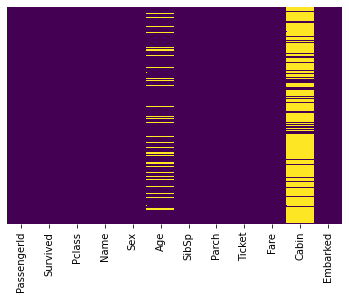

In [9]:
#visually looking at the nulls in the dataset
sns.heatmap(train_d.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [10]:
##check distribution of Age by class
#Median value after sort, height of box is IQR, whiskers: 1.5*IQR from Q1 & Q3

trace0 = go.Box(x=train_d['Pclass'],
                y=train_d['Age'],
                name = 'Age',
                marker = dict(color='rgb(12,12,140)'))
data = [trace0]
layout = {'xaxis': {'title': 'PClass'},
          'yaxis': {'title': 'Age'},
          'title': 'Age by Class'
          }

fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')

In [11]:
#function to impute nulls in age column
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [12]:
#applying function on dataset
train_d['Age'] = train_d[['Age','Pclass']].apply(impute_age,axis=1)

In [13]:
#drop cabin and nulls
train_d.drop(['PassengerId','Cabin'],axis=1, inplace=True)

#drop nulls
train_d.dropna(axis=0,inplace=True)

In [14]:
#check nulls again
train_d.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [15]:
#checking new shape
train_d.shape

(889, 10)

In [16]:
#check duplicates
train_d.duplicated().sum()

0

> from the above we can observe that our dataset is clean, it contains no nulls(only 2 records dropped).

In [17]:
#checking for Outliers and Anomalies in the numerical columns
#Median value after sort, height of box is IQR, whiskers: 1.5*IQR from Q1 & Q3

trace0 = go.Box(y=train_d['Age'],
                name = 'Age',
                marker = dict(color='rgb(12,12,140)'))
trace1 = go.Box(y=train_d['Fare'],
                name = 'Fare',
                marker = dict(color='rgb(120,12,120)'))
data = [trace0,trace1]
layout = {
          'title': 'Boxplots'
          }

fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')

> Age has a max of 80 which is possible. The fare of about $500 seems a bit excessive but external data validation will be done and if need be the outliers will be dealt with.

In [18]:
#load dataset 2(test)
test_d = pd.read_csv('test (1).csv')

In [19]:
#check head
test_d.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


>We can immediately not it has all the same features as the train dataset except the target isn't present(Survived column). Meaning we will use this dataset to only perform predictions after building the model using the train dataset.

In [20]:
#check tail
test_d.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [21]:
#check number of records
test_d.shape

(418, 11)

In [22]:
#checking column types
test_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [23]:
#checking for nulls
test_d.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

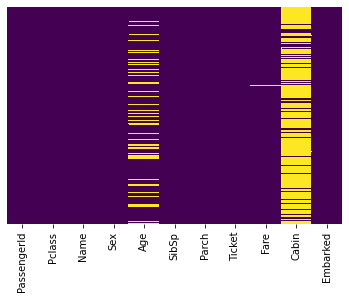

In [24]:
#visually looking at the nulls in the dataset
sns.heatmap(test_d.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [25]:
##check distribution of Age by class
#Median value after sort, height of box is IQR, whiskers: 1.5*IQR from Q1 & Q3

trace0 = go.Box(x=test_d['Pclass'],
                y=test_d['Age'],
                name = 'Age',
                marker = dict(color='rgb(12,12,140)'))
data = [trace0]
layout = {'xaxis': {'title': 'PClass'},
          'yaxis': {'title': 'Age'},
          'title': 'Age by Class'
          }

fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')

In [26]:
#function to impute nulls in age column(using the medians from the plots above)
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 27

        else:
            return 24

    else:
        return Age

In [27]:
#applying function on dataset
test_d['Age'] = test_d[['Age','Pclass']].apply(impute_age,axis=1)

In [28]:
#drop cabin and nulls
test_d.drop(['PassengerId','Cabin'],axis=1, inplace=True)

#drop nulls
test_d.dropna(axis=0,inplace=True)

In [29]:
#checking for nulls
test_d.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [30]:
#checking new shape
test_d.shape

(417, 9)

> Only 1 record was dropped.

In [31]:
#checking for Outliers and Anomalies in the numerical columns
#Median value after sort, height of box is IQR, whiskers: 1.5*IQR from Q1 & Q3

trace0 = go.Box(y=test_d['Age'],
                name = 'Age',
                marker = dict(color='rgb(12,12,140)'))
trace1 = go.Box(y=test_d['Fare'],
                name = 'Fare',
                marker = dict(color='rgb(120,12,120)'))
data = [trace0,trace1]
layout = {
          'title': 'Boxplots'
          }

fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')

> Again we see some outliers in age and fare.

# Exploratory Data Analysis

Univariate Analysis

In [32]:
# Ploting the univariate summaries and recording our observations
def uni_stats(df):
  out_df = pd.DataFrame(columns=['Count', 'Nulls', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev', 'Skew', 'Kurt' ])


  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].mode().values[0], df[col].mean(), df[col].min(), 
                         df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]

    else:
     out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(),df[col].mode().values[0],'-', '-', '-', '-', 
                        '-', '-', '-', '-', '-']

  return out_df

uni_stats(train_d)

,Count,Nulls,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev,Skew,Kurt
Survived,889.0,0.0,2.0,0,0.382452,0,0,0,1,1,0.48626,0.484568,-1.76918
Pclass,889.0,0.0,3.0,3,2.31159,1,2,3,3,3,0.8347,-0.636998,-1.26944
Name,889.0,0.0,889.0,"Abbing, Mr. Anthony",-,-,-,-,-,-,-,-,-
Sex,889.0,0.0,2.0,male,-,-,-,-,-,-,-,-,-
Age,889.0,0.0,88.0,24,29.0193,0.42,22,26,36.5,80,13.2098,0.546718,0.795206
SibSp,889.0,0.0,7.0,0,0.524184,0,0,0,1,8,1.1037,3.69106,17.839
Parch,889.0,0.0,7.0,0,0.382452,0,0,0,0,6,0.806761,2.74516,9.75059
Ticket,889.0,0.0,680.0,1601,-,-,-,-,-,-,-,-,-
Fare,889.0,0.0,247.0,8.05,32.0967,0,7.8958,14.4542,31,512.329,49.6975,4.80144,33.5085
Embarked,889.0,0.0,3.0,S,-,-,-,-,-,-,-,-,-


> As can be seen from the above summary table:
- Most of the numerical data is in acceptable range for Skew and Kurtosis except Fare (Skew approx 4, Kurtosis approx 33), SibSp(Kurtosis	approx 17) & Parch (Kurtosis approx 10). This features have a positive skew meaning that they have heavy tails to the right(Outliers)

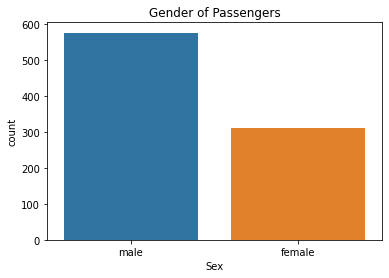

In [33]:
#Count plots: Gender
sns.countplot(x='Sex',data=train_d)
plt.title('Gender of Passengers')
plt.show()

>As can be seen almost twice as many males were present as compared to females.

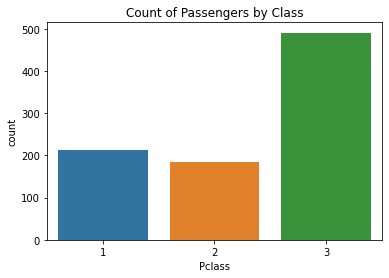

In [34]:
#Count plots: Class
sns.countplot(x='Pclass',data=train_d)
plt.title('Count of Passengers by Class')
plt.show()

>Majority of persons were in 3rd class(Economy class) which is expected in transportation like trains and planes because it's cheaper. Surprisingly there were more passengers in 1st class compared to 2nd class.

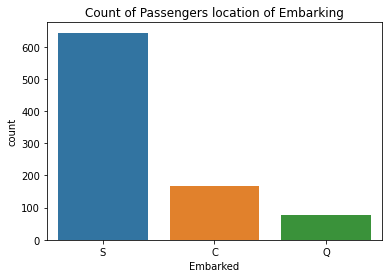

In [35]:
#Count plots: Embarked
sns.countplot(x='Embarked',data=train_d)
plt.title('Count of Passengers location of Embarking')
plt.show()

> Most Passengers embarked in S which according to external sources is Southampton(point of start of voyage) in England, followed by Cherbourg in France and Queenstown in Ireland.

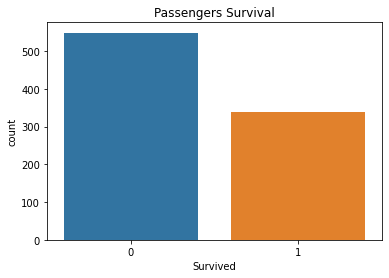

In [36]:
#Count plots: Survived
sns.countplot(x='Survived',data=train_d)
plt.title('Passengers Survival')
plt.show()

> Majority of the passengers did not survive.

In [37]:
train_d.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [38]:
##Visual look at the Age of passengers

trace2 = go.Histogram( x=train_d['Age'],
                      opacity=0.75,
                      name='Age',
                      marker = dict(color= 'rgba(12,50,196,0.6)'))

data = [trace2]
layout = go.Layout(
                   title='Histogram of Passenger Ages',
                   xaxis= dict(title='Age'),
                   yaxis= dict(title='Count'))
fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')

>The highest number of passengers were between 24-26, accounting for 190 persons. There were 7 persons over 70 years old and about 44 persons betwen 0-6years old. The distribution is approximately normal with a few outliers.

In [39]:
##Visual look at the Fare paid by passengers

trace2 = go.Histogram( x=train_d['Fare'],
                      opacity=0.75,
                      name='Fare',
                      marker = dict(color= 'rgba(12,50,196,0.6)'))

data = [trace2]
layout = go.Layout(
                   title='Histogram of Passenger Fares',
                   xaxis= dict(title='Fare'),
                   yaxis= dict(title='Count'))
fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')

> Right skewed which was highlighted in the summary table. Of note most passengers paid between 5-15 dollars(about 440 passengers). There are 3 ouliers/passengers who paid between 505-515 dollars for a ticket. But the prices are real according to validation.

>Ticket prices back then:

>First Class Suite- 870 euros or 4,350 usd

>First Class Berth- 30 euros or 150 usd

>Second Class- 12 euros or 60 usd

>Third Class- 3 to 8 euros or 40 dollars
(Wilkinson & Hamilton, 2011)


Bivariate Analysis

<Figure size 432x288 with 0 Axes>

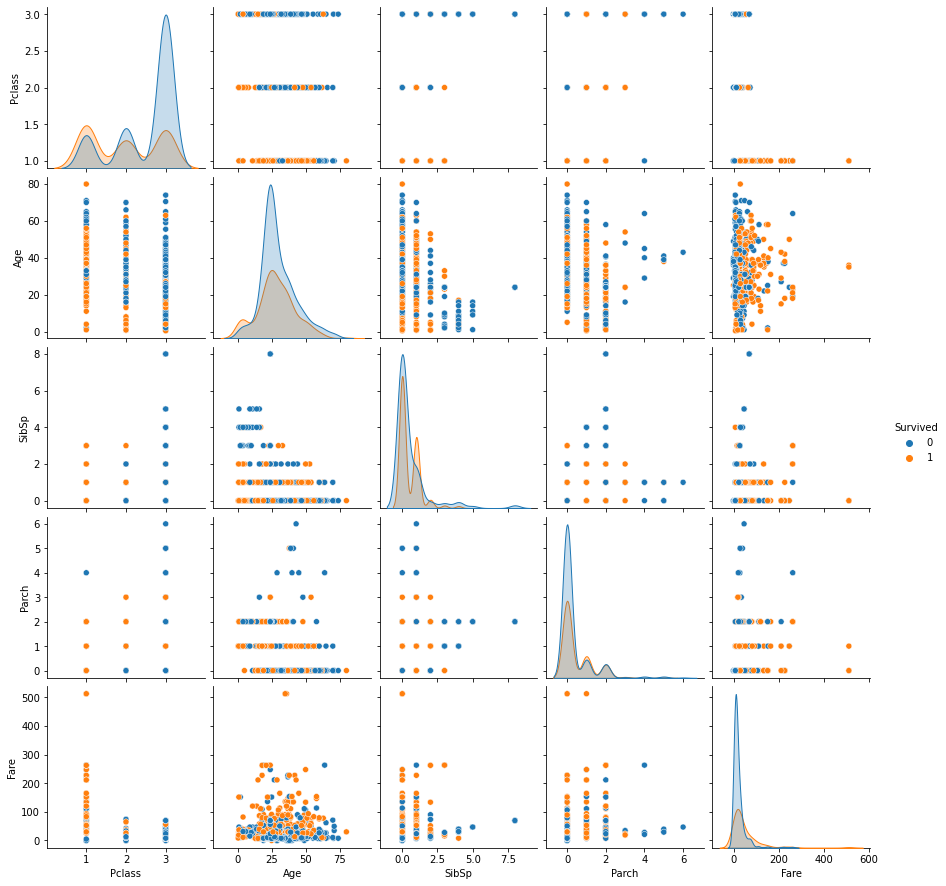

In [40]:
# Plot the pairplot
plt.figure()
sns.pairplot(train_d, hue='Survived')
plt.show()


> From the above pairplot we can see that a considerable number of those who survived were in 1st class compared to 2nd and 3rd, which may highlight that they may have been attended to/taken into consideration in regards to rescue efforts compared to the other classes.

In [41]:
#Correlations
train_d.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193
Age,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000


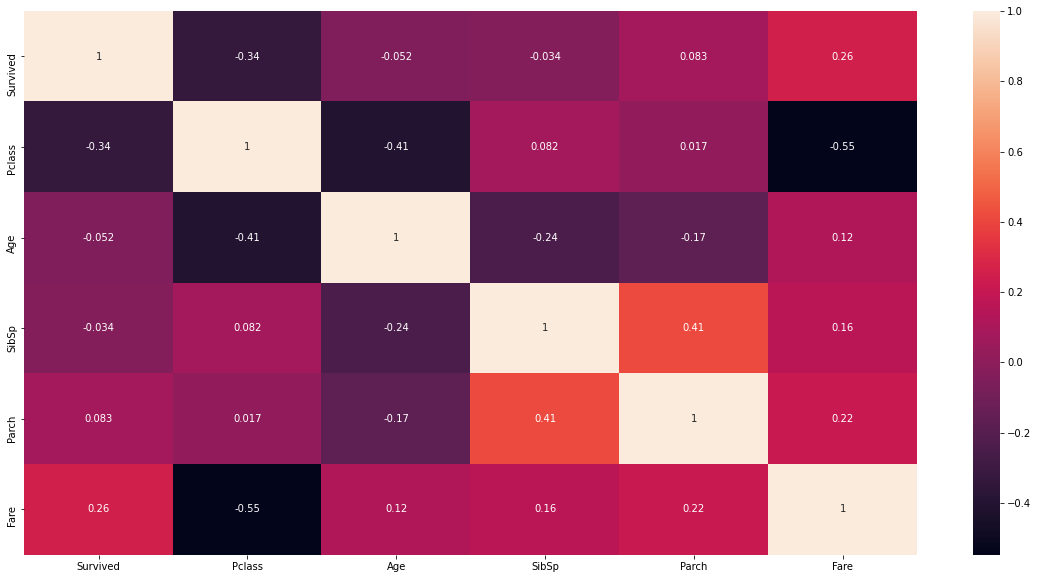

In [42]:
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(train_d.corr(),annot=True)
plt.show()

> The features present in the dataset don't seem to have high correlations which is good for machine learning models.


# Feature Engineering


Here the data will be worked on to ensure features that will create the best possible models.

In [43]:
#dropping unwanted columns Name and Ticket
#making copy
train_df = train_d.copy(deep=True)

train_df.drop(['Name','Ticket'], axis=1, inplace=True)

In [44]:
#Encode categorical data
#label encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])

#One hot encode Embarked column using get dummies
train_clean = pd.get_dummies(train_df)


In [45]:
#Viewing encoded categories.
train_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


# Implementing the Solution

## K-NN Classification

### Checking multicollinearity


In [47]:
#multicollinearity test
# Let's display the correlations between the variables
correlations = train_clean[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']].corr()

correlations

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.541585,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,0.127741,-0.405549,0.081656,0.016824,-0.548193
Sex,-0.541585,0.127741,1.000000,0.083730,-0.116348,-0.247508,-0.179958
Age,-0.052051,-0.405549,0.083730,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.034040,0.081656,-0.116348,-0.242807,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.247508,-0.170089,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,-0.179958,0.120938,0.160887,0.217532,1.000000


In [48]:
#VIF test
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.652431,0.513997,0.826275,0.282429,0.168253,0.050590,-0.063617
Pclass,0.513997,1.923789,0.105379,0.655105,-0.069499,-0.103894,0.896908
Sex,0.826275,0.105379,1.515731,0.018246,0.083816,0.262872,0.046721
Age,0.282429,0.655105,0.018246,1.342269,0.237755,0.084224,0.071402
SibSp,0.168253,-0.069499,0.083816,0.237755,1.296192,-0.444003,-0.206678
Parch,0.050590,-0.103894,0.262872,0.084224,-0.444003,1.314788,-0.247323
Fare,-0.063617,0.896908,0.046721,0.071402,-0.206678,-0.247323,1.594745


> The dataset features have an acceptable range of multicollinearity (1-5) which is vital to building good models.

### Build model function

In [49]:
#Build model as function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

def create_model(X,y, test_frac):

  #split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_frac, random_state = 0)

  #scale the data
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  #create and fit model
  classifier = KNeighborsClassifier().fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  #evaluate model
  print('Training Accuracy:', accuracy_score(y_train, classifier.predict(X_train)))
  print('Test Accuracy:', accuracy_score(y_test,y_pred))
  print('\n')
  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('\n')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))

### Define Features and Target variable

In [50]:
#features and label
X = train_clean.drop('Survived', axis=1)
y = train_clean['Survived']

### Run and Evaluate model

In [51]:
#Run default model with 80/20 split
create_model(X,y,0.2)

Training Accuracy: 0.8790436005625879
Test Accuracy: 0.7191011235955056


Confusion Matrix:
[[85 20]
 [30 43]]


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       105
           1       0.68      0.59      0.63        73

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178



> The above model has a good accuracy but shows overfitting as the training set accuracy and test set accuracy differ by about 16%. It shows a very low Recall on the Survived class.

### 70:30 Train/Test split

In [52]:
#Changing the split to 70/30
create_model(X,y,0.3)

Training Accuracy: 0.864951768488746
Test Accuracy: 0.7602996254681648


Confusion Matrix:
[[131  26]
 [ 38  72]]


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       157
           1       0.73      0.65      0.69       110

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.75       267
weighted avg       0.76      0.76      0.76       267



> The training set accuracy drops slightly by about 1% but the Test set accuracy improves by about 4%. The recall for class 1 (Survived) has improved. This indicates that with this split the model is better generalized than before. A reduction in overfitting.

### 60:40 Train/Test split

In [53]:
#Changing the split to 60/40
create_model(X,y,0.4)

Training Accuracy: 0.8780487804878049
Test Accuracy: 0.7837078651685393


Confusion Matrix:
[[187  29]
 [ 48  92]]


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       216
           1       0.76      0.66      0.70       140

    accuracy                           0.78       356
   macro avg       0.78      0.76      0.77       356
weighted avg       0.78      0.78      0.78       356



> The training set accuracy is almost similar to the 80/20 split. It is important to note that the recall for class 1 (Survived) is the best This indicates that with this split the model is better generalized than before. A reduction in overfitting. The difference between the two sets accuracy is the least amongst all splits.

## Optimization

Text(0, 0.5, 'Error Rate')

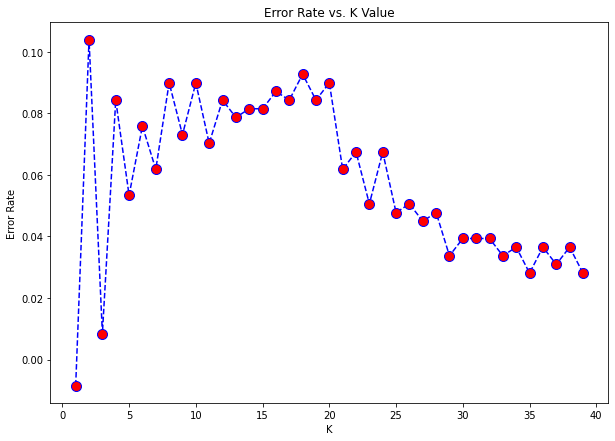

In [54]:
#Choosing the 60/40 split to perform optimization on
#Perform k optimization

#features and label
X = train_clean.drop('Survived', axis=1)
y = train_clean['Survived']

#define split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

#scale the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
  

#Using error rates
error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

>At k=14 we can see the optimum value as the variance in the error rate is low between successive observations.

In [55]:
#run model with optimal k and split
#Choosing the 60/40 split to perform optimization on
#Perform k optimization

#features and label
X = train_clean.drop('Survived', axis=1)
y = train_clean['Survived']

#define split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

#scale the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#create and fit model
classifier = KNeighborsClassifier(n_neighbors = 14).fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#evaluate model
print('Training Accuracy:', accuracy_score(y_train, classifier.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Training Accuracy: 0.8555347091932458
Test Accuracy: 0.7949438202247191


Confusion Matrix:
[[194  22]
 [ 51  89]]


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       216
           1       0.80      0.64      0.71       140

    accuracy                           0.79       356
   macro avg       0.80      0.77      0.78       356
weighted avg       0.80      0.79      0.79       356



In [56]:
# confirming the Accuracy through cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from statistics import mean, stdev


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
n_scores = cross_val_score(classifier, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), stdev(n_scores)))

Accuracy: 0.751 (0.052)


> We can observe that using a 60/40 split and k=14 the test accuracy improves by 1%. The precision of class 1 improves by 4% but the recall reduces by 1%. Overall, because this dataset doesn't have ramifications in the real world we can focus on accuracy and reducing overfitting which has been achieved. Though after cross validation the test set accuracy dropped to 75% on average with a Standard Deviation of 5%.

### Predicting the Test set results

In [57]:
#creating copy to work with
test_df = test_d.copy(deep=True)

#drop unnecessary columns
test_df.drop(['Name','Ticket'], axis=1, inplace=True)

In [58]:
#Encode categorical data
#label encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_df['Sex'] = le.fit_transform(test_df['Sex'])

#One hot encode Embarked column using get dummies
test_clean = pd.get_dummies(test_df)


In [59]:
test_clean.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [60]:
test_clean.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
413,3,1,24.0,0,0,8.0500,0,0,1
414,1,0,39.0,0,0,108.9000,1,0,0
415,3,1,38.5,0,0,7.2500,0,0,1
416,3,1,24.0,0,0,8.0500,0,0,1
417,3,1,24.0,1,1,22.3583,1,0,0


In [61]:
test_clean.shape

(417, 9)

In [62]:
#reset index since shape shows 417 records but index ends at 417 instead of 416
test_clean.reset_index(inplace=True)

#drop index column created
tc = test_clean.drop('index', axis=1)

In [63]:
##features of test set
X = tc


In [64]:
#predicting the test
y_pred = classifier.predict(X)

In [65]:
#viewing array of predictions
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [66]:
#predictions as a df appended to set
col_name = ['predicted_survival']
preds_test = pd.DataFrame(y_pred, columns=col_name)
preds_test.tail()


,predicted_survival
412,0
413,1
414,0
415,0
416,1


In [67]:
#predictions as a df appended to test set
col_name = ['predicted_survival']
preds_test = pd.DataFrame(y_pred, columns=col_name)

#append to test set
test_predicted = pd.concat([tc, preds_test], axis=1)
test_predicted.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,predicted_survival
0,3,1,34.5,0,0,7.8292,0,1,0,0
1,3,0,47.0,1,0,7.0000,0,0,1,0
2,2,1,62.0,0,0,9.6875,0,1,0,0
3,3,1,27.0,0,0,8.6625,0,0,1,0
4,3,0,22.0,1,1,12.2875,0,0,1,1


Visual Representation of Test Predictions

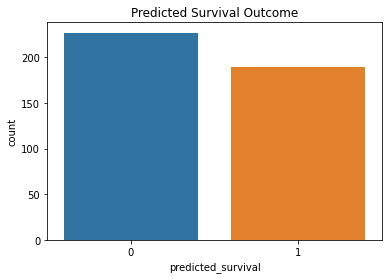

In [68]:
#Count plots: Predicted survival status (1: Survived and 0:Not survived)
sns.countplot(x='predicted_survival',data=test_predicted)
plt.title('Predicted Survival Outcome')
plt.show()

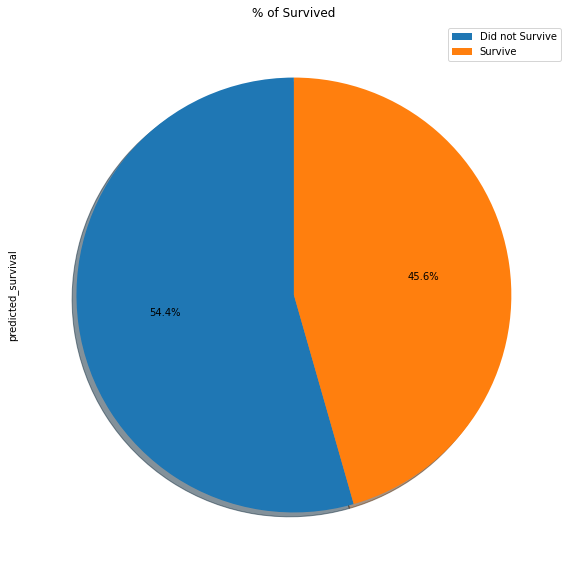

In [69]:
#Pie chart of the above just for a quick proportion view

test_predicted.groupby(['predicted_survival'])['predicted_survival'].count().plot(kind='pie',labels=None, shadow = True,startangle=90,
                                                                      figsize=(15,10), autopct='%1.1f%%')
plt.legend(labels=['Did not Survive','Survive'])
plt.title('% of Survived')
plt.show()



> Majority of the test data persons are predicted not to suvive.

> Overall, the model built had a cross validated test Accuracy of approximately 75% with a standard deviation of 5% which is not the ideal model but has a good accuracy given that it won't be used to make decisions that may require high Accuracy levels. It was seen that by optimizing for the k value (k=14) and also using a 60/40 spilt we got the best performing model which reduced overfitting compared to the other models created.

# Challenging the Solution


> It is possible to improve the model used through finding of optimal distance metric in the K-NN classifier ('minkowski' or ' manhattan since default used is 'euclidian'). Other methods such as data reduction may ensure efficiency, though this was not used since the dataset didn't have many features.
>Additionally we should try another classification algorithm to check for the best possible option performance-wise.

# Follow up questions

## a) Did we have the right data?


> Yes because the data provided allowed for a model that was fairly accurate to be built and used to make predictions, which was the metric of success we had beforehand.

## b) Do we need other data to answer our question?

> Firstly, it is recommended that other algorithms be tested before deciding whether additional data is required.



## c) Did we have the right question?

> Given the dataset and the business objective, the right question was asked and explored.